# Advance on Groundout
```python
df["threshold_rounded"] = 0.50 \
                        + 0.35 * df["runner_indulgence_with_vibe"] \
                        - 0.10 * df["fielder_tenaciousness_with_vibe"] \
                        - 0.10 * (df["ballpark_inconvenience"] - 0.50) \
                        - 0.10 * (df["ballpark_elongation"] - 0.50)
```
Problems when the batter is debted (DEBT_THREE). The debt roll gets inserted in the middle of the "extra" rolls (see flowchart in resim.py)

In [126]:
# Load Dataframe

import glob

import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("../roll_data/*-groundout_formulas.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Select only double plays
df = df[df['event_type']=='advance']

seasons = [11,12,13,14]
df = df[df['season'].isin(seasons)]

# Remove Stadiums
# df = df[df['stadium_id'].isna()]

# Print initial and final states with this roll
print(df.groupby(['baserunners','baserunners_next']).size())

print(f"{len(df)} events.")

baserunners  baserunners_next
[1]          [1]                 1257
             [2]                 2469
[2, 0]       [0]                  110
             [1]                  196
             [2, 1]                98
[2, 1]       [1]                  162
             [2, 1]               102
             [2, 2]               192
             [2]                  448
[2, 2]       [2, 2]                 6
             []                    12
[2]          [2]                  773
             []                  1844
dtype: int64
7669 events.


In [127]:
# Vibes
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_mods"].astype(str).str.contains("SCATTERED"), "runner_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0
df.loc[df["runner_on_second_mods"].astype(str).str.contains("SCATTERED"), "runner_on_second_vibes"] = 0
df.loc[df["runner_on_third_mods"].astype(str).str.contains("SCATTERED"), "runner_on_third_vibes"] = 0
df.loc[df["runner_on_third_hh_mods"].astype(str).str.contains("SCATTERED"), "runner_on_third_vibes"] = 0

df['batter_inv_patheticism'] = 1-df['batter_patheticism']/df["batter_multiplier"]
df['batter_inv_patheticism_with_vibe'] = df['batter_inv_patheticism'] * (1 + 0.2*df['batter_vibes'])
df['batter_inv_tragicness'] = 1-df['batter_tragicness']/df["batter_multiplier"]
df['batter_inv_tragicness_with_vibe'] = df['batter_inv_tragicness'] * (1 + 0.2*df['batter_vibes'])
df['vibes_mul'] = 1 + 0.2*df['batter_vibes']
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr + "_scaled"] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["batter_vibes"])
df = df.copy()

for attr in [
    f"runner_base_thirst",
    f"runner_continuation",
    f"runner_ground_friction",
    f"runner_indulgence",
    f"runner_laserlikeness",
]:
    df[attr + "_scaled"] = df[attr] * df[f"runner_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df[f"runner_vibes"])
for base in ["first","second","third","third_hh"]:
    for attr in [
        f"runner_on_{base}_base_thirst",
        f"runner_on_{base}_continuation",
        f"runner_on_{base}_ground_friction",
        f"runner_on_{base}_indulgence",
        f"runner_on_{base}_laserlikeness",
    ]:
        df[attr + "_scaled"] = df[attr] * df[f"runner_on_{base}_multiplier"]
        df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df[f"runner_on_{base}_vibes"])
df = df.copy()

for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr + "_scaled"] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["pitcher_vibes"])
df = df.copy()


for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_scaled"] = df[attr] * df["fielder_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["fielder_vibes"])
df = df.copy()

len(df)

7669

In [128]:
# Ignore multipliers and some mods

# Debt gets rolled in the middle of the groundout rolls, but this isn't accounted for yet.
for exclude_mod in ["DEBT_THREE"]:
    df = df[~df["batter_mods"].astype(str).str.contains(exclude_mod)]
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING", "SHELLED"]:
#     df = df[~df["batter_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["pitcher_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["fielder_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["runner_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["runner_on_second_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["runner_on_third_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["runner_on_third_hh_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
#     df = df[~df["batting_team_mods"].astype(str).str.contains(exclude_mod)]
print(len(df))
# Only use events with no multipliers
# df = df[
#     (df["pitcher_multiplier"] == 1)
#     & (df["batter_multiplier"] == 1)
#     & (df["runner_multiplier"] == 1)
#     & (df["fielder_multiplier"] == 1)
#     & (df["runner_on_first_multiplier"] == 1)
#     & (df["runner_on_second_multiplier"] == 1)
#     & (df["runner_on_third_multiplier"] == 1)
#     & (df["runner_on_third_hh_multiplier"] == 1)
# ]

print(len(df))

7669
7669


In [129]:
y = df["passed"]
X = df[
    [
        "roll",
        # "batter_buoyancy",
        # "batter_divinity_with_vibe",
        # "batter_martyrdom_with_vibe",
        # "batter_moxie_with_vibe",
        # "batter_musclitude_with_vibe",
        # "batter_patheticism_with_vibe",
        # "batter_thwackability_with_vibe",
        # "batter_tragicness_with_vibe",
        # "batter_musclitude_with_vibe",
        # "batter_patheticism_with_vibe",
        # "batter_inv_patheticism_with_vibe",
        # "batter_inv_patheticism",
        # "batter_tragicness_with_vibe",
        # "batter_inv_tragicness",
        # "pitcher_shakespearianism_with_vibe",
        # 'fielder_anticapitalism_with_vibe',
        # 'fielder_chasiness_with_vibe',
        # 'fielder_omniscience_with_vibe',
        'fielder_tenaciousness_with_vibe',
        # 'fielder_watchfulness_with_vibe',
        # 'pitcher_anticapitalism_with_vibe',
        # 'pitcher_chasiness_with_vibe',
        # 'pitcher_omniscience_with_vibe',
        # 'pitcher_tenaciousness_with_vibe',
        # 'pitcher_watchfulness_with_vibe',
        # 'runner_continuation_with_vibe',
        # 'runner_continuation_scaled',
        'runner_indulgence_with_vibe',
        # 'ballpark_grandiosity',
        # 'ballpark_fortification',
        # 'ballpark_obtuseness',
        # 'ballpark_ominousness',
        'ballpark_inconvenience',
        # 'ballpark_viscosity',
        # 'ballpark_forwardness',
        # 'ballpark_mysticism',
        'ballpark_elongation',
        # 'ballpark_filthiness',
    ]
]

# Test out a specific coefficient
# X["roll_advance"] = X["roll_advance"]+0.1*X["ballpark_elongation"]
# X.drop("ballpark_elongation", axis="columns", inplace=True)
# X["roll_advance"] = X["roll_advance"]+0.1*X["ballpark_inconvenience"]
# X.drop("ballpark_inconvenience", axis="columns", inplace=True)
X

,roll,fielder_tenaciousness_with_vibe,runner_indulgence_with_vibe,ballpark_inconvenience,ballpark_elongation
2,0.014915,0.856315,0.700174,0.500000,0.500000
3,0.636475,0.856315,0.161536,0.500000,0.500000
12,0.123836,0.720714,0.465127,0.500000,0.500000
34,0.101922,0.582739,0.524875,0.500000,0.500000
35,0.333112,0.858565,0.524875,0.500000,0.500000
...,...,...,...,...,...
33486,0.291341,0.273484,1.132846,0.540501,0.475801
33489,0.035257,1.336066,1.248878,0.479740,0.481888
33492,0.419188,0.335157,1.150766,0.505260,0.575745
33493,0.998084,0.655611,1.063135,0.781742,0.557553


In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

sc = StandardScaler()
X2 = sc.fit_transform(X)    

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000).fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

print()
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[[2462    6]
 [  23 5178]]
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2468
        True       1.00      1.00      1.00      5201

    accuracy                           1.00      7669
   macro avg       0.99      1.00      1.00      7669
weighted avg       1.00      1.00      1.00      7669

0.9962185421828139

[-0.58005804]


[(1.0, 'roll'),
 (-0.34384063674769627, 'runner_indulgence_with_vibe'),
 (0.09903145562139981, 'fielder_tenaciousness_with_vibe'),
 (0.08649926230710923, 'ballpark_inconvenience'),
 (0.07165028425878321, 'ballpark_elongation')]

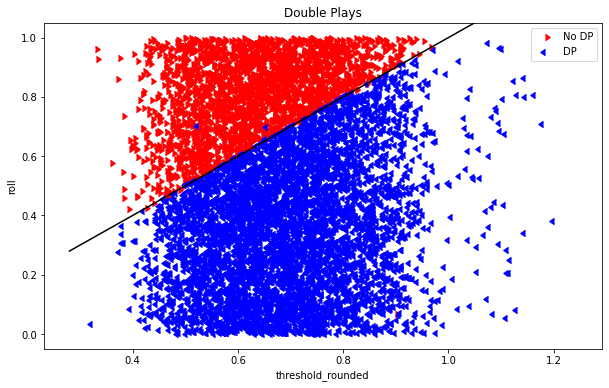

In [131]:
# Make scatter plot

# Manual threshold
df["threshold_rounded"] = 0.50 \
                        + 0.35 * df["runner_indulgence_with_vibe"] \
                        - 0.10 * df["fielder_tenaciousness_with_vibe"] \
                        - 0.10 * (df["ballpark_inconvenience"] - 0.50) \
                        - 0.10 * (df["ballpark_elongation"] - 0.50)
# df["threshold_rounded"] = df["threshold_rounded"].clip(lower=0.001)
# print(df.loc[df["passed"], "roll"].max())

# SVC threshold
df["threshold"] = -intercept_scaled[0]
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        df["threshold"] += pair[0] * df[pair[1]]

x_val = "threshold_rounded"
# x_val = "threshold"
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.scatter(
    df[~df["passed"]][x_val],
    df[~df["passed"]]["roll"],
    color="red",
    label="No DP",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    df[df["passed"]][x_val],
    df[df["passed"]]["roll"],
    color="blue",
    label="DP",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title("Double Plays")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(-0.05, 1.05)
ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()


8 outliers


,passed,offset,roll,threshold_rounded,baserunners,baserunners_next,inning,batter_name,batter_mods,runner_name,fielder_name,runner_mods,fielder_mods,batting_team_mods,pitching_team_mods,weather,season,day,game_id,play_count
29010,True,0.177375,0.701838,0.524463,[2],[],4,Moses Mason,RECEIVER;RETURNED;DEBT_THREE,Hiroto Cerna,Goodwin Morin,NaN,EGO2,GROWTH,POPCORN_PAYOUTS,Weather.FLOODING,14,47,45967c1e-8fb4-4cc0-b9bf-e10dc34b6efe,167
27291,False,-0.015072,0.514019,0.529090,[2],[2],7,Wyatt Mason X,ECHO;MAXIMALIST;RETURNED;DEBT_THREE,Carmelo Plums,Sandie Turner,NaN,SPICY;PERK;ON_FIRE,NaN,BIRD_SEED,Weather.SALMON,14,28,73eeab25-2a6b-4c71-8ab8-a22942c28b50,281
27955,False,-0.250766,0.310588,0.561354,"[2, 0]","[2, 1]",6,Wyatt Mason X,ECHO;MAXIMALIST;RETURNED;DEBT_THREE,Carmelo Plums,Kichiro Guerra,NaN,ALTERNATE;MAXIMALIST,NaN,LOVE,Weather.FEEDBACK,14,36,cac35c5e-0464-4962-9930-2a7c25b79bf4,235
26932,False,-0.339760,0.258149,0.597909,[2],[2],8,Moses Mason,RECEIVER;RETURNED;DEBT_THREE,Hiroto Cerna,Greer Gwiffin,NaN,NaN,GROWTH,SUN_KISSED;SUN2_PAYOUTS,Weather.FEEDBACK,14,24,db113395-af00-4578-8f83-3e03bd26b202,296
29520,True,0.004672,0.658790,0.654117,[2],[],6,Wyatt Mason X,ECHO;MAXIMALIST;RETURNED;DEBT_THREE,Sparks Beans,Tiana Wheeler,NaN,NaN,NaN,O_NO,Weather.FLOODING,14,52,d9c5206a-9f4c-49ff-8e67-070b437ff8fd,327
27280,True,0.043912,0.699428,0.655516,[2],[],7,York Silk,DOUBLE_PAYOUTS;HONEY_ROASTED;EGO2;RETURNED;DEB...,Kennedy Loser,Chorby Short,FLINCH;REVERBERATING,HOMEBODY;OVERPERFORMING,CARCINIZATION;UNHOLEY,O_NO,Weather.FLOODING,14,28,95dc7bd5-7969-4b2c-913c-7e220354cceb,259
31405,False,-0.093466,0.592281,0.685746,[1],[1],4,York Silk,DOUBLE_PAYOUTS;HONEY_ROASTED;EGO2;RETURNED;DEB...,Squid Galvanic,Bates Bentley,NaN,NaN,CARCINIZATION;UNHOLEY,SINKING_SHIP,Weather.FEEDBACK,14,75,53e9c83e-5320-461a-a1bc-4a947edfaeff,153
31988,False,-0.829787,0.068837,0.898624,[2],[2],2,York Silk,DOUBLE_PAYOUTS;HONEY_ROASTED;EGO2;RETURNED;DEB...,T-t -ox,Beck Whitney,FLINCH;SCATTERED,WANDERER,CARCINIZATION;UNHOLEY,SINKING_SHIP,Weather.FEEDBACK,14,82,f1a0d0f5-6187-4515-807c-7e969c470444,107


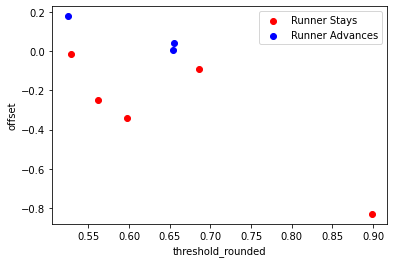

In [132]:
# Plot outliers
df["offset"] = df["roll"] - df["threshold_rounded"]
outliers = df[(df["passed"] & (df["offset"] >= 0)) | (~df["passed"] & (df["offset"] <= 0))]
print(f"{len(outliers)} outliers")

fig, ax = plt.subplots(1, facecolor='white')
x_val = "threshold_rounded"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="Runner Stays",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Runner Advances",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

outliers[
    [
        "passed",
        "offset",
        "roll",
        "threshold_rounded",
        "baserunners",
        "baserunners_next",
        "inning",
        "batter_name",
        "batter_mods",
        "runner_name",
        "fielder_name",
        "runner_mods",
        "fielder_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "weather",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
].sort_values("threshold_rounded")